In [3]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
import pandas as pd
import os

def load_police_data():
    csv_path = os.path.join(os.path.join("police_data"), "crimes_2012_to_2017.csv")
    return pd.read_csv(csv_path, index_col=0)

In [14]:
police_data = load_police_data()
police_data = police_data.drop(columns='Location')
police_data = police_data.drop(columns='ID')
police_data = police_data.drop(columns='Case Number')
police_data = police_data.drop(columns='Block')
police_data = police_data.drop(columns='Domestic')
police_data = police_data.drop(columns='Beat')
police_data = police_data.drop(columns='FBI Code')
police_data = police_data.drop(columns='X Coordinate')
police_data = police_data.drop(columns='Y Coordinate')
police_data = police_data.drop(columns='Updated On')
police_data = police_data.drop(columns='IUCR')


In [15]:
police_data.head()

,Date,Primary Type,Description,Location Description,Arrest,District,Ward,Community Area,Year,Latitude,Longitude
3,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,10.0,24.0,29.0,2016,41.864073,-87.706819
89,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,3.0,20.0,42.0,2016,41.782922,-87.604363
197,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,15.0,37.0,25.0,2016,41.894908,-87.758372
673,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,15.0,28.0,25.0,2016,41.885687,-87.749516
911,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,15.0,28.0,25.0,2016,41.886297,-87.761751


In [6]:
police_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456714 entries, 3 to 6253474
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1456714 non-null  object 
 1   Primary Type          1456714 non-null  object 
 2   Description           1456714 non-null  object 
 3   Location Description  1455056 non-null  object 
 4   Arrest                1456714 non-null  bool   
 5   District              1456713 non-null  float64
 6   Ward                  1456700 non-null  float64
 7   Community Area        1456674 non-null  float64
 8   Year                  1456714 non-null  int64  
 9   Latitude              1419631 non-null  float64
 10  Longitude             1419631 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 123.6+ MB


In [7]:
pd.set_option('display.max_rows', 500)
police_data["Location Description"].value_counts()

STREET                                             330471
RESIDENCE                                          233530
APARTMENT                                          185023
SIDEWALK                                           160891
OTHER                                               55774
PARKING LOT/GARAGE(NON.RESID.)                      41768
ALLEY                                               31771
RESIDENTIAL YARD (FRONT/BACK)                       30645
SMALL RETAIL STORE                                  28803
SCHOOL, PUBLIC, BUILDING                            25959
RESTAURANT                                          25872
RESIDENCE-GARAGE                                    25720
RESIDENCE PORCH/HALLWAY                             25511
VEHICLE NON-COMMERCIAL                              25104
DEPARTMENT STORE                                    20709
GROCERY FOOD STORE                                  15999
GAS STATION                                         15387
PARK PROPERTY 

In [8]:
police_data["Date"].value_counts()

01/01/2012 12:01:00 AM    166
01/01/2013 12:01:00 AM    122
01/01/2012 12:00:00 AM    115
01/01/2015 12:01:00 AM    110
01/01/2014 12:01:00 AM    104
                         ... 
06/22/2014 04:40:00 PM      1
06/22/2014 01:57:00 PM      1
06/22/2014 04:11:00 PM      1
06/22/2014 02:24:00 PM      1
05/03/2016 09:07:00 PM      1
Name: Date, Length: 582146, dtype: int64

In [9]:
police_data["Arrest"].value_counts()

False    1079242
True      377472
Name: Arrest, dtype: int64

In [14]:
police_data["Primary Type"].value_counts()

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [10]:
police_data["Description"].value_counts()

SIMPLE                                                         150600
$500 AND UNDER                                                 136036
DOMESTIC BATTERY SIMPLE                                        130700
TO VEHICLE                                                      75801
OVER $500                                                       74906
TO PROPERTY                                                     71694
POSS: CANNABIS 30GMS OR LESS                                    60557
FORCIBLE ENTRY                                                  53500
AUTOMOBILE                                                      51741
FROM BUILDING                                                   48835
RETAIL THEFT                                                    43109
UNLAWFUL ENTRY                                                  24915
TELEPHONE THREAT                                                23514
TO LAND                                                         22871
POSS: HEROIN(WHITE) 

In [11]:
police_data["District"].value_counts()

11.0    102878
8.0      96325
6.0      86915
4.0      85681
7.0      84373
25.0     83204
3.0      73195
9.0      70869
12.0     69482
10.0     66276
19.0     66115
5.0      65146
15.0     64508
18.0     63682
1.0      62022
2.0      60312
14.0     52509
16.0     50134
22.0     47484
17.0     41406
24.0     40449
20.0     23721
31.0        26
13.0         1
Name: District, dtype: int64

In [13]:
police_data["Community Area"].value_counts()

25.0    94730
8.0     50290
43.0    48909
23.0    47093
29.0    46151
28.0    43501
71.0    41634
67.0    41281
24.0    40832
32.0    39696
49.0    38227
68.0    38019
69.0    36741
66.0    34578
44.0    33152
6.0     32038
26.0    31460
27.0    28838
22.0    28185
61.0    28115
46.0    27574
19.0    26791
30.0    24905
53.0    23272
42.0    21765
7.0     21737
1.0     20500
3.0     20372
15.0    18294
38.0    18114
2.0     17736
73.0    17534
16.0    16365
40.0    15288
58.0    14455
31.0    14281
63.0    13476
35.0    13325
70.0    13311
14.0    13040
77.0    13009
21.0    12936
75.0    11471
65.0    11050
51.0    10601
56.0    10478
4.0     10255
76.0     9457
33.0     9298
60.0     9195
20.0     9138
17.0     8774
41.0     8313
48.0     8036
5.0      7992
39.0     7712
45.0     7667
52.0     7308
54.0     6959
10.0     6578
11.0     6233
34.0     6190
50.0     5889
59.0     5841
62.0     5836
57.0     5356
64.0     5315
72.0     5102
37.0     5015
13.0     4711
36.0     3482
74.0  

In [7]:
police_data.describe()

,District,Ward,Community Area,Year,Latitude,Longitude
count,1.456713e+06,1.456700e+06,1.456674e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,1.125920e+01,2.287027e+01,3.745632e+01,2.013897e+03,4.184147e+01,-8.767224e+01
std,6.904691e+00,1.380589e+01,2.144029e+01,1.449584e+00,9.430126e-02,6.661726e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,6.000000e+00,1.000000e+01,2.300000e+01,2.013000e+03,4.176787e+01,-8.771528e+01
50%,1.000000e+01,2.300000e+01,3.200000e+01,2.014000e+03,4.185797e+01,-8.766613e+01
75%,1.700000e+01,3.400000e+01,5.600000e+01,2.015000e+03,4.190529e+01,-8.762813e+01
max,3.100000e+01,5.000000e+01,7.700000e+01,2.017000e+03,4.202271e+01,-8.752453e+01


Saving figure attribute_histogram_plots


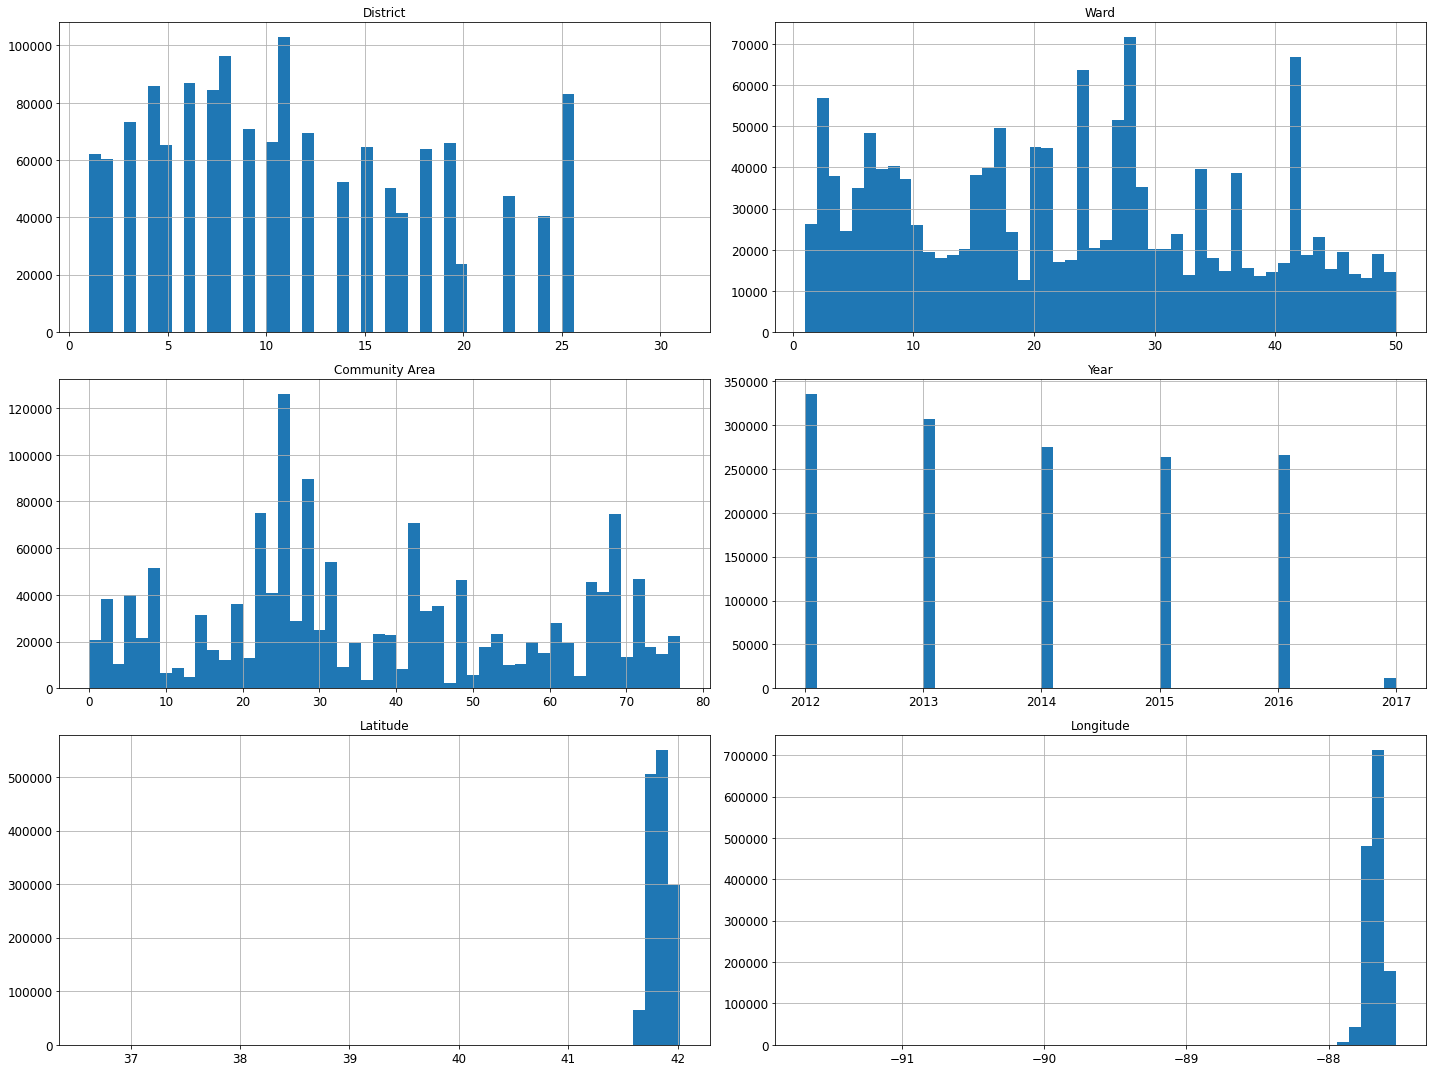

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
police_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [9]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [10]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(police_data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

1165372 train + 291342 test


In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [14]:
crime_with_id = police_data.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(crime_with_id, 0.2, "index")

In [15]:
# police_data = pd.DataFrame(police_data)
# police_data = police_data.apply(pd.to_numeric, errors='coerce')
# police_data = police_data.dropna()
# police_data = police_data.dropna(axis=0, subset=['Longitude'])
# police_data = police_data.dropna(axis=0, subset=['Latitude'])

In [16]:
# crime_with_id["id"] = police_data["Longitude"] * 1000 + police_data["Latitude"]
# pd.set_option('display.max_rows', 50)
# crime_with_id["id"]
# police_data["Longitude"]
# police_data["Latitude"]
# train_set, test_set = split_train_test_by_id(crime_with_id, 0.2, "id")

In [17]:
police_data.head()

,Date,Primary Type,Description,Location Description,Arrest,District,Ward,Community Area,Year,Latitude,Longitude
3,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,10.0,24.0,29.0,2016,41.864073,-87.706819
89,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,3.0,20.0,42.0,2016,41.782922,-87.604363
197,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,15.0,37.0,25.0,2016,41.894908,-87.758372
673,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,15.0,28.0,25.0,2016,41.885687,-87.749516
911,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,15.0,28.0,25.0,2016,41.886297,-87.761751


In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(police_data, test_size=0.2, random_state=42)

In [19]:
test_set.head()


,Date,Primary Type,Description,Location Description,Arrest,District,Ward,Community Area,Year,Latitude,Longitude
6091472,07/11/2016 10:06:00 PM,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,STREET,True,14.0,1.0,22.0,2016,41.915753,-87.688450
3489790,10/30/2015 03:45:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,10.0,22.0,30.0,2015,41.837869,-87.724373
2441069,02/03/2012 12:20:00 PM,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA GARAGE / OTHER PROPERTY,False,2.0,3.0,38.0,2012,41.809347,-87.618919
3498527,11/11/2015 08:00:00 PM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,6.0,21.0,71.0,2015,41.747746,-87.664585
2868682,06/03/2013 11:50:00 AM,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,ALLEY,True,15.0,28.0,25.0,2013,41.886191,-87.750385


<AxesSubplot:>

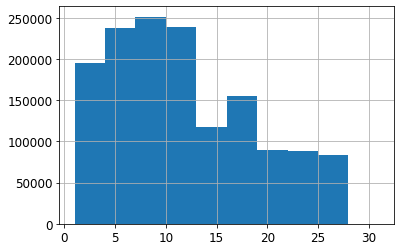

In [20]:
# police_data['District'] = police_data['District'].astype(int)
police_data["District"].hist()
# police_data['Arrest']

<AxesSubplot:>

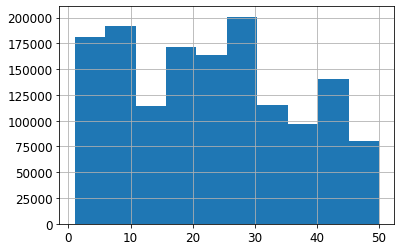

In [21]:
police_data["Ward"].hist()

<AxesSubplot:>

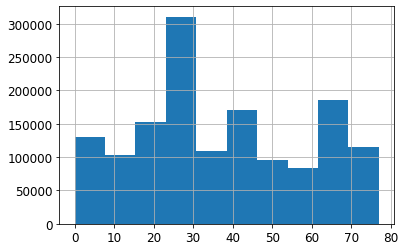

In [24]:
police_data["Community Area"].hist()

Saving figure bad_visualization_plot


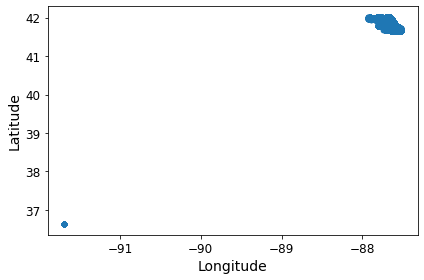

In [26]:
police_data.plot(kind="scatter", x="Longitude", y="Latitude")
save_fig("bad_visualization_plot")

array([[<AxesSubplot:xlabel='District', ylabel='District'>,
        <AxesSubplot:xlabel='Ward', ylabel='District'>,
        <AxesSubplot:xlabel='Community Area', ylabel='District'>],
       [<AxesSubplot:xlabel='District', ylabel='Ward'>,
        <AxesSubplot:xlabel='Ward', ylabel='Ward'>,
        <AxesSubplot:xlabel='Community Area', ylabel='Ward'>],
       [<AxesSubplot:xlabel='District', ylabel='Community Area'>,
        <AxesSubplot:xlabel='Ward', ylabel='Community Area'>,
        <AxesSubplot:xlabel='Community Area', ylabel='Community Area'>]],
      dtype=object)

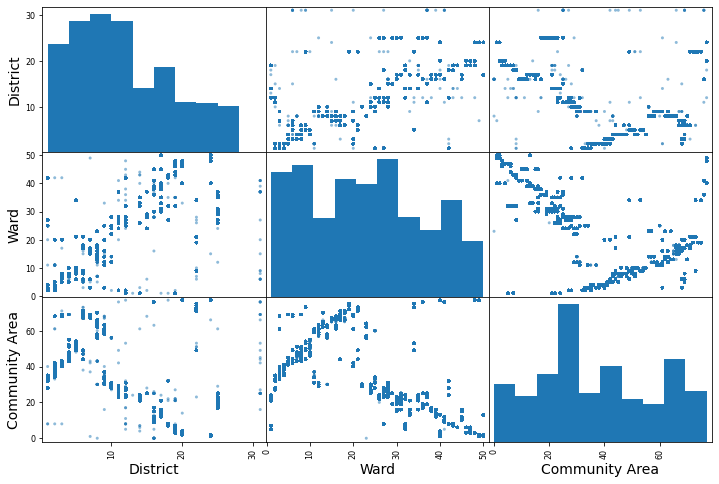

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["District", "Ward", "Community Area"]
scatter_matrix(police_data[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")
